In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Assuming 'data' is your DataFrame containing the monthly returns of all constituents
data = pd.read_csv('/content/gdrive/MyDrive/Quantitative analysis/MCV/output (3).csv')
data

,ASHOKLEY.NS,BRITANNIA.NS,CIPLA.NS,EICHERMOT.NS,HCLTECH.NS,HEROMOTOCO.NS,HINDUNILVR.NS,INFY.NS,ITC.NS,MARUTI.NS,SUNPHARMA.NS,TATACONSUM.NS,TCS.NS,TITAN.NS,WIPRO.NS
0,142.207840,4219.798340,1062.334106,3193.600830,973.958740,2603.371094,2519.197510,1484.572144,320.961731,8324.958008,980.493164,754.002380,3119.466553,2557.464111,391.249847
1,141.012009,4170.346680,1067.244385,3178.368652,975.738953,2607.684570,2503.098145,1483.159668,319.274262,8304.599609,992.392761,758.799622,3167.194336,2605.159668,395.231537
2,139.481354,4163.611816,1058.316772,3180.149170,971.288452,2597.044434,2497.239502,1456.127563,315.320679,8344.276367,987.475586,753.952942,3170.350342,2589.161377,387.915222
3,142.016495,4240.494141,1079.594116,3222.135498,978.315735,2652.497559,2544.109863,1437.034546,321.540344,8382.218750,999.375244,755.535522,3166.954834,2553.825928,385.128021
4,141.346847,4285.570801,1067.690674,3215.113281,967.727844,2628.917236,2536.970947,1411.025391,323.083160,8304.896484,991.999451,753.062744,3071.738525,2529.903564,380.250458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,167.176209,5161.100098,1235.599976,4006.050049,1432.274536,3914.600830,2575.600098,1562.900024,448.611328,10217.150390,1236.600830,992.799988,3778.896729,3627.350098,461.665405
241,169.022919,5235.950195,1244.949951,4040.399902,1427.819336,4045.644531,2584.750000,1543.949951,449.843231,10270.650390,1240.428955,1007.349976,3750.782227,3656.699951,469.099579
242,169.265900,5216.799805,1239.750000,4120.000000,1441.430298,4042.511475,2608.300049,1567.099976,450.483826,10288.500000,1245.350830,1026.750000,3766.247559,3689.250000,469.947784
243,170.383667,5282.000000,1260.800049,4091.899902,1441.821777,4150.877441,2633.800049,1562.650024,457.382507,10271.599610,1254.995972,1041.000000,3755.080811,3715.100098,468.450958


In [ ]:
data = data.iloc[::-1].reset_index(drop=True)

print("Reversed Data:\n", data.head())

Reversed Data:
    ASHOKLEY.NS  BRITANNIA.NS     CIPLA.NS  EICHERMOT.NS   HCLTECH.NS  \
0   176.458374   5338.450195  1246.300049   4143.500000  1435.603882   
1   170.383667   5282.000000  1260.800049   4091.899902  1441.821777   
2   169.265900   5216.799805  1239.750000   4120.000000  1441.430298   
3   169.022919   5235.950195  1244.949951   4040.399902  1427.819336   
4   167.176209   5161.100098  1235.599976   4006.050049  1432.274536   

   HEROMOTOCO.NS  HINDUNILVR.NS      INFY.NS      ITC.NS    MARUTI.NS  \
0    4117.357910    2663.949951  1542.900024  455.411438  10302.34961   
1    4150.877441    2633.800049  1562.650024  457.382507  10271.59961   
2    4042.511475    2608.300049  1567.099976  450.483826  10288.50000   
3    4045.644531    2584.750000  1543.949951  449.843231  10270.65039   
4    3914.600830    2575.600098  1562.900024  448.611328  10217.15039   

   SUNPHARMA.NS  TATACONSUM.NS       TCS.NS     TITAN.NS    WIPRO.NS  
0   1252.311157    1086.800049  3748.6577

In [ ]:
import numpy as np

# Calculate log returns
log_returns = np.log(data / data.shift(1)).dropna()

print("Log Returns:\n", log_returns.head())


Log Returns:
    ASHOKLEY.NS  BRITANNIA.NS  CIPLA.NS  EICHERMOT.NS  HCLTECH.NS  \
1    -0.035032     -0.010631  0.011567     -0.012531    0.004322   
2    -0.006582     -0.012421 -0.016837      0.006844   -0.000272   
3    -0.001437      0.003664  0.004186     -0.019509   -0.009488   
4    -0.010986     -0.014399 -0.007539     -0.008538    0.003115   
5    -0.015527     -0.019862 -0.011191     -0.012080   -0.028184   

   HEROMOTOCO.NS  HINDUNILVR.NS   INFY.NS    ITC.NS  MARUTI.NS  SUNPHARMA.NS  \
1       0.008108      -0.011382  0.012719  0.004319  -0.002989      0.002142   
2      -0.026454      -0.009729  0.002844 -0.015198   0.001644     -0.007715   
3       0.000775      -0.009070 -0.014883 -0.001423  -0.001736     -0.003960   
4      -0.032928      -0.003546  0.012199 -0.002742  -0.005223     -0.003091   
5      -0.021977      -0.008735 -0.017361 -0.008272  -0.020198     -0.008195   

   TATACONSUM.NS    TCS.NS  TITAN.NS  WIPRO.NS  
1      -0.043056  0.001712  0.010730 -0.003933 

In [ ]:
# Calculate mean log returns (monthly)
mean_log_returns = log_returns.mean()

# Annualize the returns
annualized_returns = mean_log_returns * 245

print("Annualized Returns:\n", annualized_returns)


Annualized Returns:
 ASHOKLEY.NS     -0.216680
BRITANNIA.NS    -0.236112
CIPLA.NS        -0.160365
EICHERMOT.NS    -0.261459
HCLTECH.NS      -0.389562
HEROMOTOCO.NS   -0.460283
HINDUNILVR.NS   -0.056099
INFY.NS         -0.038695
ITC.NS          -0.351313
MARUTI.NS       -0.213987
SUNPHARMA.NS    -0.245693
TATACONSUM.NS   -0.367096
TCS.NS          -0.184489
TITAN.NS        -0.364146
WIPRO.NS        -0.184772
dtype: float64


In [ ]:
# Calculate covariance matrix of log returns
cov_matrix = log_returns.cov() * 245  # Annualize the covariance matrix

print("Covariance Matrix:\n", cov_matrix)


Covariance Matrix:
                ASHOKLEY.NS  BRITANNIA.NS  CIPLA.NS  EICHERMOT.NS  HCLTECH.NS  \
ASHOKLEY.NS       0.047811      0.006695  0.006497      0.012697    0.005689   
BRITANNIA.NS      0.006695      0.026662 -0.000541      0.005135    0.003272   
CIPLA.NS          0.006497     -0.000541  0.048729      0.001095    0.003968   
EICHERMOT.NS      0.012697      0.005135  0.001095      0.054950    0.006822   
HCLTECH.NS        0.005689      0.003272  0.003968      0.006822    0.040174   
HEROMOTOCO.NS     0.011086      0.004787  0.003882      0.012653    0.006617   
HINDUNILVR.NS     0.006010      0.009934  0.004025      0.007288    0.006217   
INFY.NS           0.001971      0.001763  0.006436      0.007320    0.029010   
ITC.NS            0.006318      0.011391  0.003140      0.005652    0.002586   
MARUTI.NS         0.007942      0.003793  0.005049      0.010307    0.005731   
SUNPHARMA.NS      0.004588      0.003473  0.009142      0.003499    0.003615   
TATACONSUM.NS     0.

In [ ]:
from scipy.optimize import minimize

def portfolio_performance(weights, mean_returns, cov_matrix):
    returns = np.dot(weights, mean_returns)
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return returns, std

def max_utility_portfolio(mean_returns, cov_matrix, risk_aversion):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix, risk_aversion)

    # Constraints: weights sum to 1
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((0, 1) for _ in range(num_assets))

    def utility(weights, mean_returns, cov_matrix, risk_aversion):
        returns, std = portfolio_performance(weights, mean_returns, cov_matrix)
        return -(returns - (0.5 * risk_aversion * std**2))  # Negative for minimization

    result = minimize(utility, num_assets*[1./num_assets], args=args,
                      method='SLSQP', bounds=bounds, constraints=constraints)

    return result

risk_aversion = 3  # Example risk aversion coefficient
optimal_portfolio = max_utility_portfolio(annualized_returns, cov_matrix, risk_aversion)
optimal_weights = optimal_portfolio.x

print("Optimal Portfolio Weights:\n", optimal_weights)


Optimal Portfolio Weights:
 [0.00000000e+00 3.67063681e-16 0.00000000e+00 0.00000000e+00
 6.86900710e-17 1.99890920e-16 6.61817064e-01 3.38182936e-01
 0.00000000e+00 2.25214231e-16 0.00000000e+00 1.10274145e-16
 0.00000000e+00 0.00000000e+00 4.72061343e-17]


In [ ]:
# Actual index weights (example values, replace with actual values)
index_weights = np.array([1.148, 2.278, 2.106, 2.381, 6.748, 1.895, 10.158, 11.133, 10.122, 7.361, 6.823, 1.938, 25.876, 5.543, 4.490]) / 100

comparison = pd.DataFrame({
    'Stock': data.columns,
    'Optimal Weights': optimal_weights,
    'Index Weights': index_weights
})

print("Comparison of Weights:\n", comparison)


Comparison of Weights:
             Stock  Optimal Weights  Index Weights
0     ASHOKLEY.NS     0.000000e+00        0.01148
1    BRITANNIA.NS     3.670637e-16        0.02278
2        CIPLA.NS     0.000000e+00        0.02106
3    EICHERMOT.NS     0.000000e+00        0.02381
4      HCLTECH.NS     6.869007e-17        0.06748
5   HEROMOTOCO.NS     1.998909e-16        0.01895
6   HINDUNILVR.NS     6.618171e-01        0.10158
7         INFY.NS     3.381829e-01        0.11133
8          ITC.NS     0.000000e+00        0.10122
9       MARUTI.NS     2.252142e-16        0.07361
10   SUNPHARMA.NS     0.000000e+00        0.06823
11  TATACONSUM.NS     1.102741e-16        0.01938
12         TCS.NS     0.000000e+00        0.25876
13       TITAN.NS     0.000000e+00        0.05543
14       WIPRO.NS     4.720613e-17        0.04490


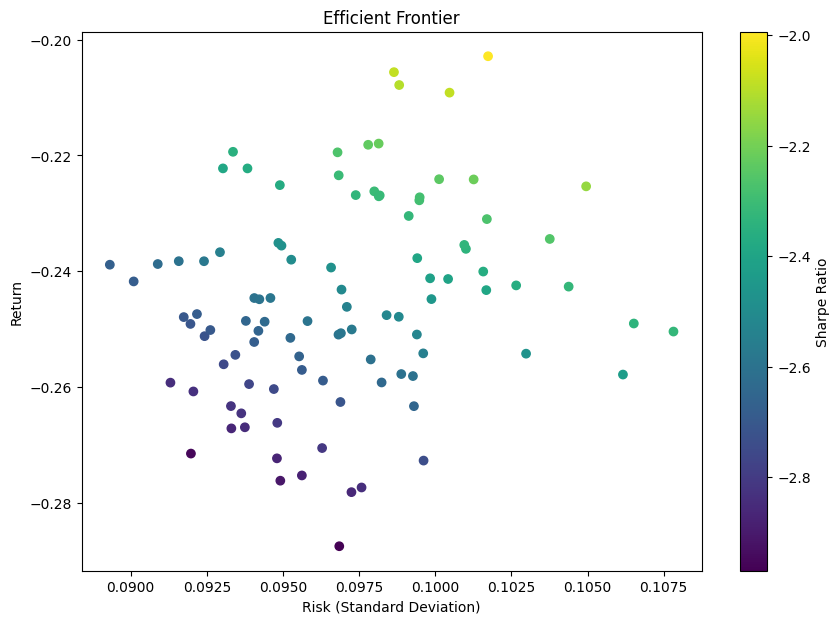

In [ ]:
import matplotlib.pyplot as plt

def efficient_frontier(mean_returns, cov_matrix, num_portfolios=100):
    results = np.zeros((3, num_portfolios))
    weights_record = []

    for i in range(num_portfolios):
        weights = np.random.random(len(mean_returns))
        weights /= np.sum(weights)

        returns, std = portfolio_performance(weights, mean_returns, cov_matrix)

        results[0,i] = returns
        results[1,i] = std
        results[2,i] = returns / std
        weights_record.append(weights)

    return results, weights_record

results, weights = efficient_frontier(annualized_returns, cov_matrix)

plt.figure(figsize=(10, 7))
plt.scatter(results[1,:], results[0,:], c=results[2,:], cmap='viridis')
plt.xlabel('Risk (Standard Deviation)')
plt.ylabel('Return')
plt.title('Efficient Frontier')
plt.colorbar(label='Sharpe Ratio')
plt.show()


MINIMUM VARIANCE PORTFOLIO

In [ ]:
from scipy.optimize import minimize
import numpy as np

# Assuming 'log_returns' is already calculated
mean_returns = log_returns.mean() * 245  # Annualized returns
cov_matrix = log_returns.cov() * 245     # Annualized covariance matrix

def portfolio_performance(weights, mean_returns, cov_matrix):
    returns = np.dot(weights, mean_returns)
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return returns, std

def min_variance_portfolio(cov_matrix):
    num_assets = len(cov_matrix)

    # Constraints: weights sum to 1
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((0, 1) for _ in range(num_assets))

    def portfolio_variance(weights, cov_matrix):
        return np.dot(weights.T, np.dot(cov_matrix, weights))

    result = minimize(portfolio_variance, num_assets*[1./num_assets],
                      args=(cov_matrix,), method='SLSQP', bounds=bounds,
                      constraints=constraints)

    return result

min_var_result = min_variance_portfolio(cov_matrix)
min_var_weights = min_var_result.x

print("Minimum Variance Portfolio Weights:\n", min_var_weights)

# Calculate performance of the minimum variance portfolio
min_var_returns, min_var_std = portfolio_performance(min_var_weights, mean_returns, cov_matrix)
print("Minimum Variance Portfolio Return:", min_var_returns)
print("Minimum Variance Portfolio Risk (Std. Dev.):", min_var_std)


Minimum Variance Portfolio Weights:
 [2.49070950e-02 1.10668089e-01 6.77365238e-02 2.59087183e-02
 3.76027901e-02 1.78164624e-02 8.79508335e-02 9.08019319e-19
 7.90833865e-02 1.26859968e-01 1.42408401e-01 6.80305898e-02
 8.56749085e-02 1.21109128e-01 4.24310681e-03]
Minimum Variance Portfolio Return: -0.2525301402054405
Minimum Variance Portfolio Risk (Std. Dev.): 0.08576585201225582


In [ ]:
index_weights = np.array([1.148, 2.278, 2.106, 2.381, 6.748, 1.895, 10.158, 11.133, 10.122, 7.361, 6.823, 1.938, 25.876, 5.543, 4.490]) / 100

comparison = pd.DataFrame({
    'Stock': log_returns.columns,
    'Minimum Variance Weights': min_var_weights,
    'Index Weights': index_weights
})

print("Comparison of Weights:\n", comparison)


Comparison of Weights:
             Stock  Minimum Variance Weights  Index Weights
0     ASHOKLEY.NS              2.490710e-02        0.01148
1    BRITANNIA.NS              1.106681e-01        0.02278
2        CIPLA.NS              6.773652e-02        0.02106
3    EICHERMOT.NS              2.590872e-02        0.02381
4      HCLTECH.NS              3.760279e-02        0.06748
5   HEROMOTOCO.NS              1.781646e-02        0.01895
6   HINDUNILVR.NS              8.795083e-02        0.10158
7         INFY.NS              9.080193e-19        0.11133
8          ITC.NS              7.908339e-02        0.10122
9       MARUTI.NS              1.268600e-01        0.07361
10   SUNPHARMA.NS              1.424084e-01        0.06823
11  TATACONSUM.NS              6.803059e-02        0.01938
12         TCS.NS              8.567491e-02        0.25876
13       TITAN.NS              1.211091e-01        0.05543
14       WIPRO.NS              4.243107e-03        0.04490


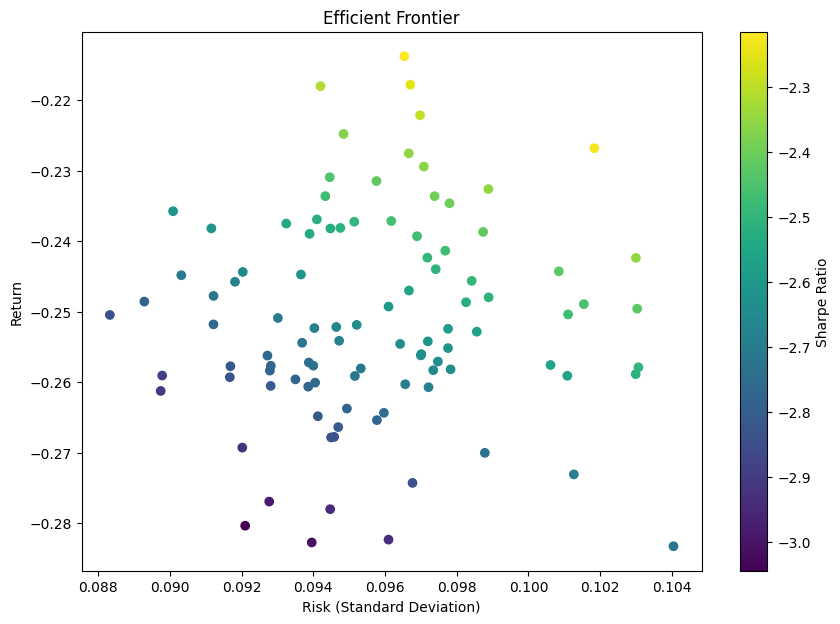

In [ ]:
import matplotlib.pyplot as plt

def efficient_frontier(mean_returns, cov_matrix, num_portfolios=100):
    results = np.zeros((3, num_portfolios))
    weights_record = []

    for _ in range(num_portfolios):
        weights = np.random.random(len(mean_returns))
        weights /= np.sum(weights)

        returns, std = portfolio_performance(weights, mean_returns, cov_matrix)

        results[0, _] = returns
        results[1, _] = std
        results[2, _] = returns / std
        weights_record.append(weights)

    return results, weights_record

results, weights = efficient_frontier(mean_returns, cov_matrix)

plt.figure(figsize=(10, 7))
plt.scatter(results[1,:], results[0,:], c=results[2,:], cmap='viridis')
plt.xlabel('Risk (Standard Deviation)')
plt.ylabel('Return')
plt.title('Efficient Frontier')
plt.colorbar(label='Sharpe Ratio')
plt.show()


smoothened curve


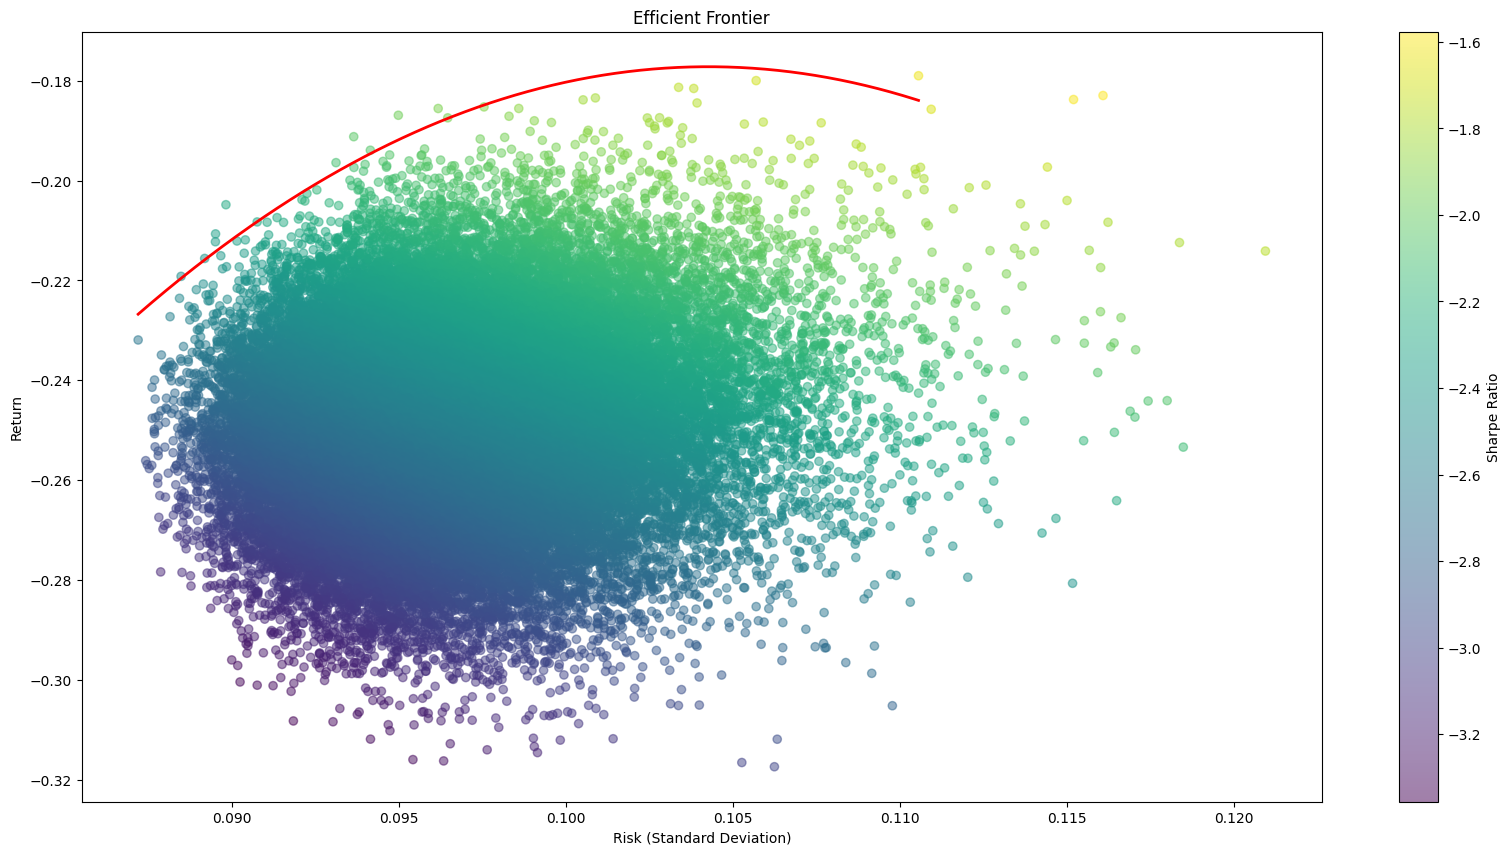

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Assuming 'log_returns' is already calculated and available
mean_returns = log_returns.mean() * 245  # Annualized returns
cov_matrix = log_returns.cov() * 245     # Annualized covariance matrix

def portfolio_performance(weights, mean_returns, cov_matrix):
    returns = np.dot(weights, mean_returns)
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return returns, std

# Generate random portfolios
def generate_random_portfolios(num_portfolios, mean_returns, cov_matrix):
    results = np.zeros((3, num_portfolios))
    weights_record = []

    for i in range(num_portfolios):
        weights = np.random.random(len(mean_returns))
        weights /= np.sum(weights)

        returns, std = portfolio_performance(weights, mean_returns, cov_matrix)

        results[0,i] = returns
        results[1,i] = std
        results[2,i] = returns / std
        weights_record.append(weights)

    return results, weights_record

num_portfolios = 50000
results, weights = generate_random_portfolios(num_portfolios, mean_returns, cov_matrix)

# Find the efficient frontier
def find_efficient_frontier(results):
    frontier_y = []
    frontier_x = []

    # Sorting by risk (standard deviation)
    sorted_indices = np.argsort(results[1])
    sorted_results = results[:, sorted_indices]

    for i in range(sorted_results.shape[1]):
        if i == 0 or sorted_results[0, i] > frontier_y[-1]:
            frontier_x.append(sorted_results[1, i])
            frontier_y.append(sorted_results[0, i])

    return frontier_x, frontier_y

frontier_x, frontier_y = find_efficient_frontier(results)

# Fit a quadratic curve
coefficients = np.polyfit(frontier_x, frontier_y, 2)
quadratic = np.poly1d(coefficients)

# Generate x values for the curve
x = np.linspace(min(frontier_x), max(frontier_x), 500)
y = quadratic(x)

# Plotting the results
plt.figure(figsize=(20, 10))
plt.scatter(results[1,:], results[0,:], c=results[2,:], cmap='viridis', alpha=0.5)
plt.plot(x, y, color='red', linewidth=2)
plt.xlabel('Risk (Standard Deviation)')
plt.ylabel('Return')
plt.title('Efficient Frontier')
plt.colorbar(label='Sharpe Ratio')
plt.show()


INDIFFERENCE CUEVE + EFFICIENT FRONTIER

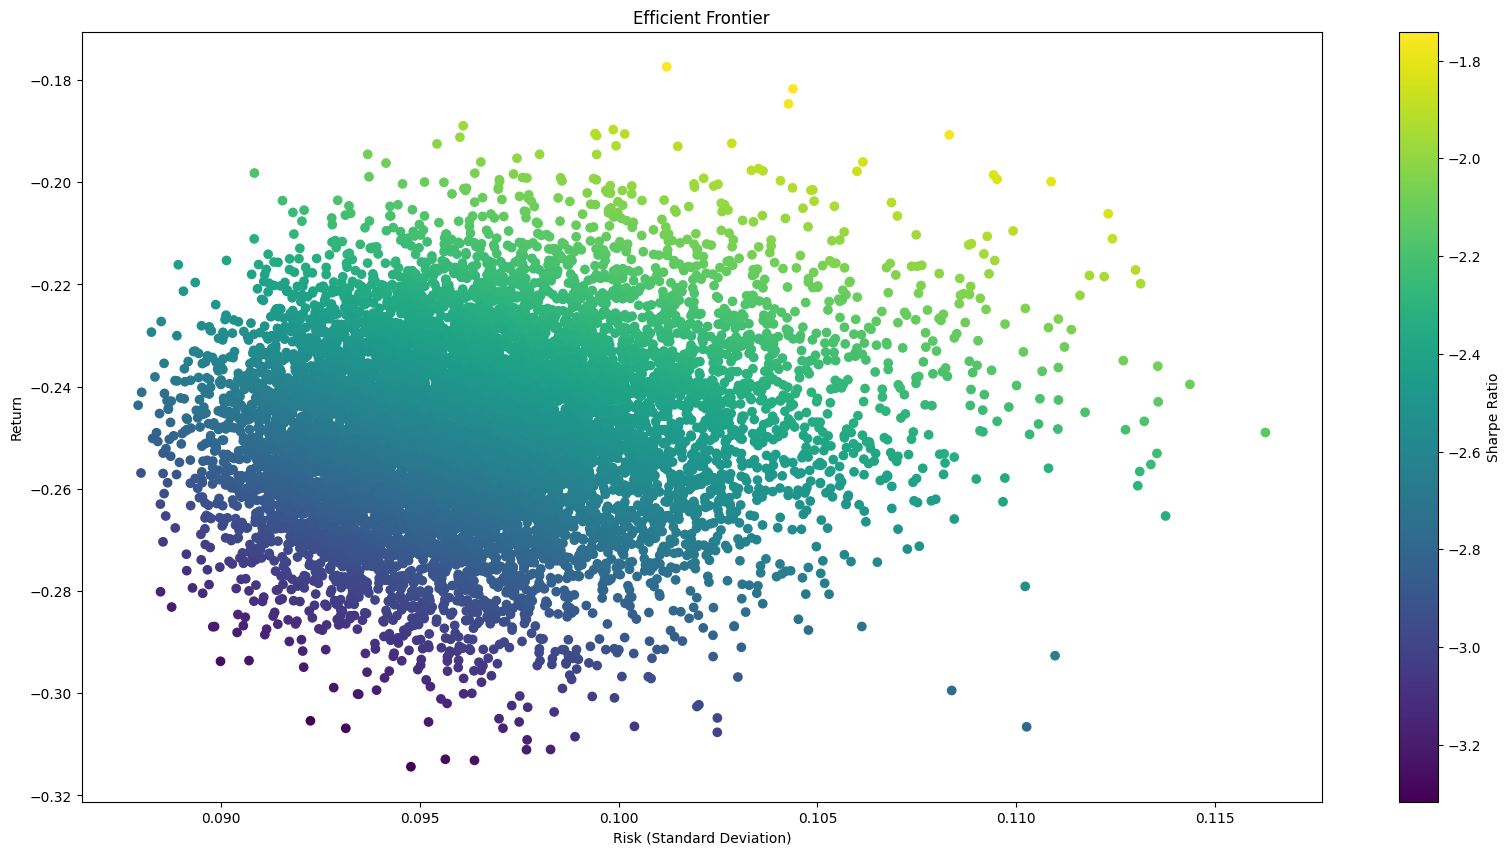

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def portfolio_performance(weights, mean_returns, cov_matrix):
    returns = np.dot(weights, mean_returns)
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return returns, std

def generate_random_portfolios(num_portfolios, mean_returns, cov_matrix):
    results = np.zeros((3, num_portfolios))
    weights_record = []

    for i in range(num_portfolios):
        weights = np.random.random(len(mean_returns))
        weights /= np.sum(weights)

        returns, std = portfolio_performance(weights, mean_returns, cov_matrix)

        results[0, i] = returns
        results[1, i] = std
        results[2, i] = returns / std  # Sharpe Ratio
        weights_record.append(weights)

    return results, weights_record

num_portfolios = 10000
results, weights = generate_random_portfolios(num_portfolios, annualized_returns, cov_matrix)

plt.figure(figsize=(20, 10))
plt.scatter(results[1, :], results[0, :], c=results[2, :], cmap='viridis')
plt.xlabel('Risk (Standard Deviation)')
plt.ylabel('Return')
plt.title('Efficient Frontier')
plt.colorbar(label='Sharpe Ratio')
plt.show()


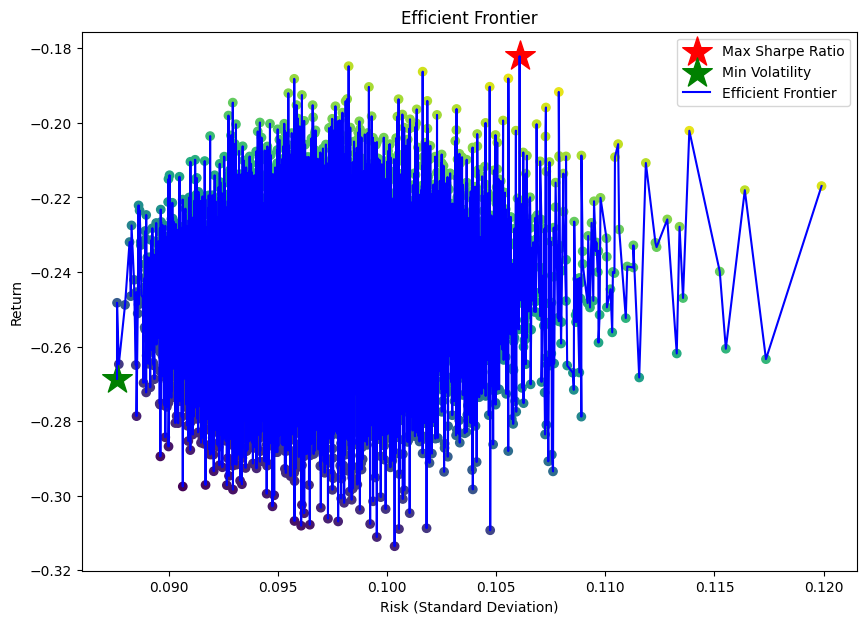

In [ ]:
def plot_efficient_frontier(mean_returns, cov_matrix, num_portfolios=10000):
    results, _ = generate_random_portfolios(num_portfolios, mean_returns, cov_matrix)

    max_sharpe_idx = np.argmax(results[2])
    sdp_max, rp_max = results[1, max_sharpe_idx], results[0, max_sharpe_idx]

    min_vol_idx = np.argmin(results[1])
    sdp_min, rp_min = results[1, min_vol_idx], results[0, min_vol_idx]

    plt.figure(figsize=(10, 7))
    plt.scatter(results[1, :], results[0, :], c=results[2, :], cmap='viridis', marker='o')
    plt.scatter(sdp_max, rp_max, marker='*', color='r', s=500, label='Max Sharpe Ratio')
    plt.scatter(sdp_min, rp_min, marker='*', color='g', s=500, label='Min Volatility')

    # Plotting the efficient frontier
    sorted_indices = np.argsort(results[1])
    plt.plot(results[1, sorted_indices], results[0, sorted_indices], color='b', label='Efficient Frontier')

    plt.title('Efficient Frontier')
    plt.xlabel('Risk (Standard Deviation)')
    plt.ylabel('Return')
    plt.legend()
    plt.show()

plot_efficient_frontier(annualized_returns, cov_matrix)


NameError: name 'sorted_indices' is not defined

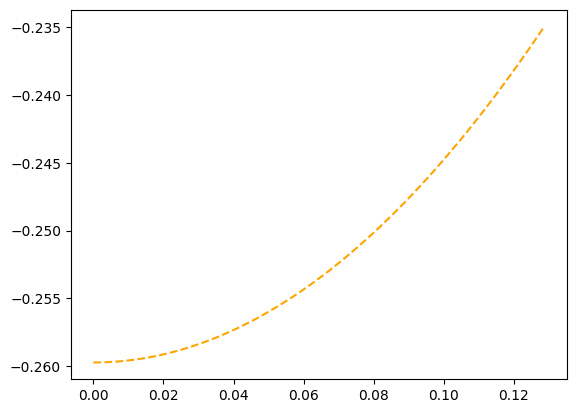

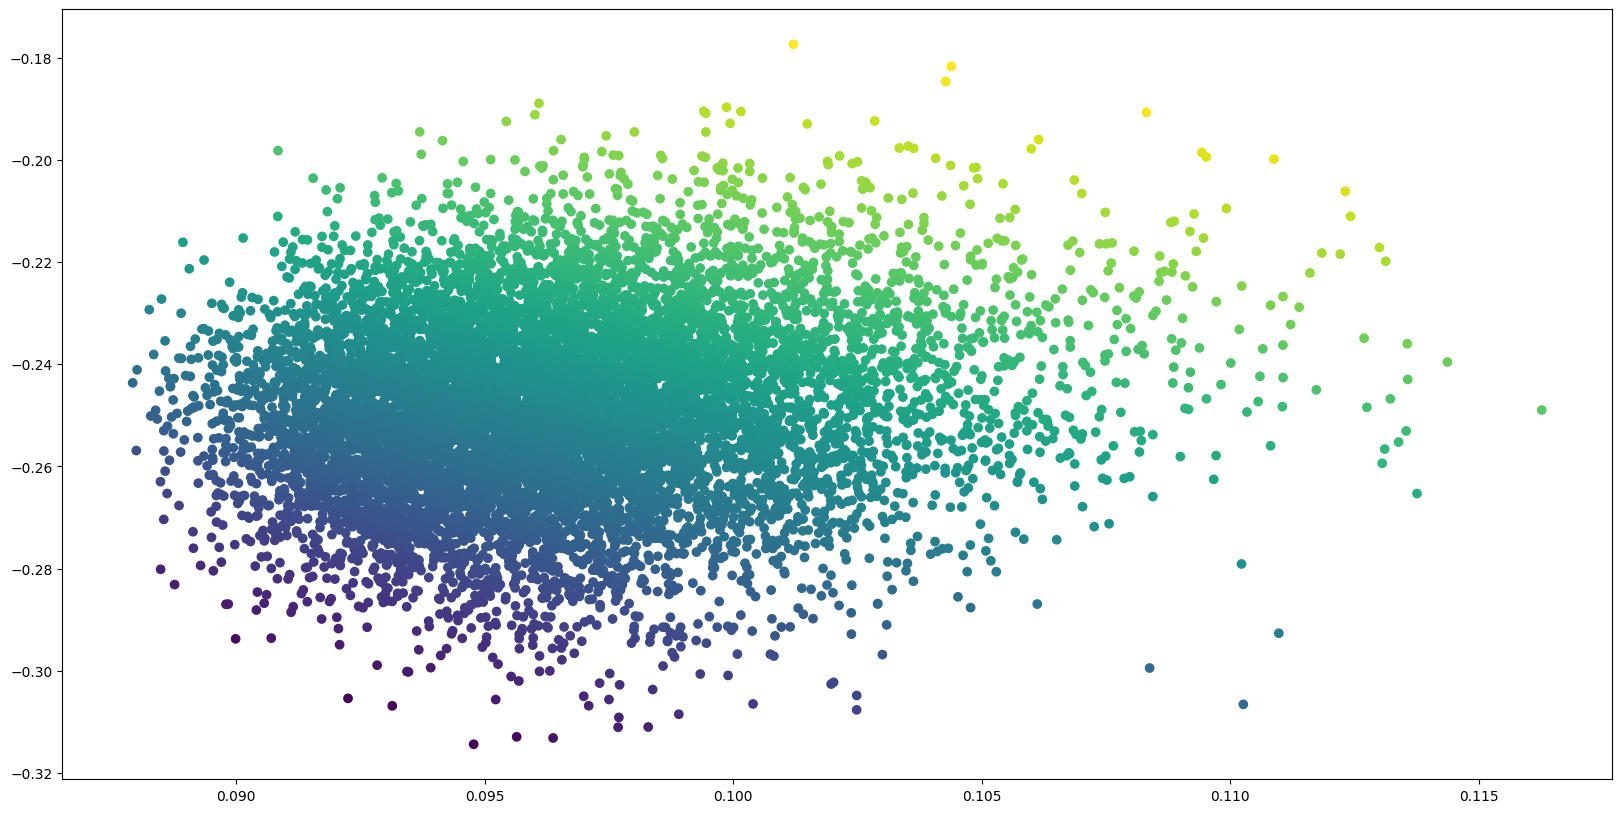

In [ ]:
def plot_indifference_curve(risk_aversion, mean_return, std_dev, num_points=100):
    utility_level = mean_return - 0.5 * risk_aversion * std_dev**2
    std_range = np.linspace(0, std_dev * 1.5, num_points)
    indifference_curve = utility_level + 0.5 * risk_aversion * std_range**2

    plt.plot(std_range, indifference_curve, label='Indifference Curve', linestyle='--', color='orange')

risk_aversion = 3  # Adjust based on your risk aversion coefficient
mean_return = annualized_returns.mean()
std_dev = np.sqrt(np.dot(min_var_weights.T, np.dot(cov_matrix, min_var_weights)))

plot_indifference_curve(risk_aversion, mean_return, std_dev)

plt.figure(figsize=(20, 10))
# Re-plot the efficient frontier with the indifference curve
plt.scatter(results[1, :], results[0, :], c=results[2, :], cmap='viridis', marker='o')
plt.plot(results[1, sorted_indices], results[0, sorted_indices], color='b', label='Efficient Frontier')
plt.scatter(sdp_max, rp_max, marker='*', color='r', s=500, label='Max Sharpe Ratio')
plt.scatter(sdp_min, rp_min, marker='*', color='g', s=500, label='Min Volatility')
plot_indifference_curve(risk_aversion, mean_return, std_dev)

plt.title('Efficient Frontier with Indifference Curve')
plt.xlabel('Risk (Standard Deviation)')
plt.ylabel('Return')
plt.legend()
plt.show()


NameError: name 'sorted_indices' is not defined

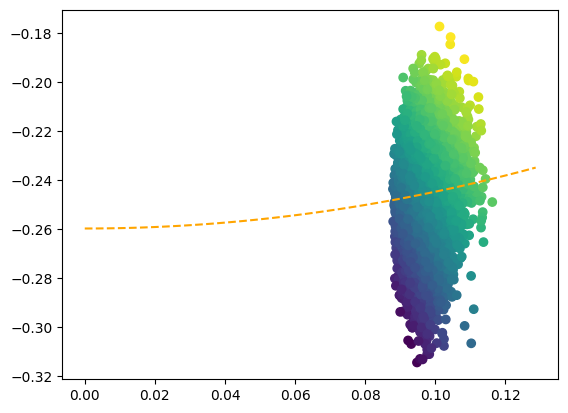

<Figure size 2000x1000 with 0 Axes>

In [ ]:
def plot_indifference_curve(risk_aversion, mean_return, std_dev, num_points=100):
    utility_level = mean_return - 0.5 * risk_aversion * std_dev**2
    std_range = np.linspace(0, std_dev * 1.5, num_points)
    indifference_curve = utility_level + 0.5 * risk_aversion * std_range**2

    plt.plot(std_range, indifference_curve, label='Indifference Curve', linestyle='--', color='orange')

risk_aversion = 3  # Adjust based on your risk aversion coefficient
mean_return = annualized_returns.mean()
std_dev = np.sqrt(np.dot(min_var_weights.T, np.dot(cov_matrix, min_var_weights)))

plot_indifference_curve(risk_aversion, mean_return, std_dev)


# Re-plot the efficient frontier with the indifference curve
plt.scatter(results[1, :], results[0, :], c=results[2, :], cmap='viridis', marker='o')
plt.plot(results[1, sorted_indices], results[0, sorted_indices], color='b', label='Efficient Frontier')
plt.scatter(sdp_max, rp_max, marker='*', color='r', s=500, label='Max Sharpe Ratio')
plt.scatter(sdp_min, rp_min, marker='*', color='g', s=500, label='Min Volatility')
plot_indifference_curve(risk_aversion, mean_return, std_dev)


plt.title('Efficient Frontier with Indifference Curve')
plt.xlabel('Risk (Standard Deviation)')
plt.ylabel('Return')
plt.legend()
plt.show()
